In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
import healpy as hp
from astropy.coordinates import SkyCoord
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
def make_dfs(i):
    # Importing the dataset containing optical clusters
    df = pd.read_csv('awd.csv', skiprows = 0, index_col=0)
    df['intensity100'] = np.loadtxt('../data/new2/planck_real_100.csv',delimiter=', ')
    df['intensity143'] = np.loadtxt('../data/new2/planck_real_143.csv',delimiter=', ')
    df['intensity217'] = np.loadtxt('../data/new2/planck_real_217.csv',delimiter=', ')
    df['intensity353'] = np.loadtxt('../data/new2/planck_real_353.csv',delimiter=', ')
    df['intensity545'] = np.loadtxt('../data/new2/planck_real_545.csv',delimiter=', ')
    df['intensity857'] = np.loadtxt('../data/new2/planck_real_857.csv',delimiter=', ')
    df['intensity090_act'] = np.loadtxt('../data/new2/090_real.csv',delimiter=', ')
    df['intensity150_act'] = np.loadtxt('../data/new2/150_real.csv',delimiter=', ')
    df['intensity220_act'] = np.loadtxt('../data/new2/220_real.csv',delimiter=', ')
    df['intensity_rosat'] = np.loadtxt('../data/new2/rosat_real.csv',delimiter=', ')
    df['cluster'] = 1    
    print(len(df))
    
    # df = pd.read_csv('../data/new/awd_not_psz.csv', skiprows = 0, index_col=0)
    # df['intensity100'] = np.loadtxt('../data/new/planck_100_rv2_1.csv',delimiter=', ')
    # df['intensity143'] = np.loadtxt('../data/new/planck_143_rv1_1.csv',delimiter=', ')
    # df['intensity217'] = np.loadtxt('../data/new/planck_217_rv0_1.csv',delimiter=', ')
    # df['intensity353'] = np.loadtxt('../data/new/planck_353_2_1.csv',delimiter=', ')
    # df['intensity545'] = np.loadtxt('../data/new/planck_545_1_1.csv',delimiter=', ')
    # df['intensity857'] = np.loadtxt('../data/new/planck_857_0_1.csv',delimiter=', ')
    # df['intensity090_act'] = np.loadtxt('../data/new/act_090_real.csv',delimiter=', ')
    # df['intensity150_act'] = np.loadtxt('../data/new/act_150_real.csv',delimiter=', ')
    # df['intensity220_act'] = np.loadtxt('../data/new/act_220_real.csv',delimiter=', ')
    # df['intensity_rosat'] = np.loadtxt('../data/new/rosat_real.csv',delimiter=', ')
    # df['cluster'] = 1

    # df = pd.read_csv('ml_sample_real.csv', skiprows = 0, index_col=0)
    # df['intensity100'] = np.loadtxt('../data/beam/real_planck_100.csv',delimiter=', ')
    # df['intensity143'] = np.loadtxt('../data/beam/real_planck_143.csv',delimiter=', ')
    # df['intensity217'] = np.loadtxt('../data/beam/real_planck_217.csv',delimiter=', ')
    # df['intensity353'] = np.loadtxt('../data/beam/real_planck_353.csv',delimiter=', ')
    # df['intensity545'] = np.loadtxt('../data/beam/real_planck_545.csv',delimiter=', ')
    # df['intensity857'] = np.loadtxt('../data/beam/real_planck_857.csv',delimiter=', ')
    # df['intensity090_act'] = np.loadtxt('../data/beam/real_act_090.csv',delimiter=', ')
    # df['intensity150_act'] = np.loadtxt('../data/beam/real_act_150.csv',delimiter=', ')
    # df['intensity220_act'] = np.loadtxt('../data/beam/real_act_220.csv',delimiter=', ')
    # df['intensity_rosat'] = np.loadtxt('../data/beam/real_rosat.csv',delimiter=', ')

    #####################################
    
    # Importing the dataset containing non-clusters
    # df2 = pd.read_csv('../data/voids_complete.csv', skiprows = 0, index_col=0)
    # df2['intensity100'] = np.loadtxt('../data/beam/fake_planck_100.csv',delimiter=', ')
    # df2['intensity143'] = np.loadtxt('../data/beam/fake_planck_143.csv',delimiter=', ')
    # df2['intensity217'] = np.loadtxt('../data/beam/fake_planck_217.csv',delimiter=', ')
    # df2['intensity353'] = np.loadtxt('../data/beam/fake_planck_353.csv',delimiter=', ')
    # # df2['intensity545'] = np.loadtxt('../data/beam/fake_planck_545.csv',delimiter=', ')
    # # df2['intensity857'] = np.loadtxt('../data/beam/fake_planck_857.csv',delimiter=', ')
    # df2['intensity090_act'] = np.loadtxt('../data/beam/fake_act_090.csv',delimiter=', ')
    # df2['intensity150_act'] = np.loadtxt('../data/beam/fake_act_150.csv',delimiter=', ')
    # df2['intensity220_act'] = np.loadtxt('../data/beam/fake_act_220.csv',delimiter=', ')
    # df2['intensity_rosat'] = np.loadtxt('../data/beam/fake_rosat.csv',delimiter=', ')

    df2 = df.copy()
    df2 = pd.concat([df2,df2,df2])
    df2[:] = 0
    df2 = df2[:len(np.loadtxt('../../../ras_planck_voidsx.csv',delimiter=', '))].reset_index(drop=True)
    len(df2)

    ras = np.loadtxt('../../../ras_planck_voidsx.csv',delimiter=', ')
    decs = np.loadtxt('../../../decs_planck_voidsx.csv',delimiter=', ')
    c = SkyCoord(ras,decs,frame='icrs',unit='deg')
    glats = np.array(c.galactic.b.degree)
    glons = np.array(c.galactic.l.degree)

    df2['glon'] = glons
    df2['glat'] = glats
    df2['intensity100'] = np.loadtxt('../../../planck_voidsx_100.csv',delimiter=', ')
    df2['intensity143'] = np.loadtxt('../../../planck_voidsx_143.csv',delimiter=', ')
    df2['intensity217'] = np.loadtxt('../../../planck_voidsx_217.csv',delimiter=', ')
    df2['intensity353'] = np.loadtxt('../../../planck_voidsx_353.csv',delimiter=', ')
    df2['intensity545'] = np.loadtxt('../../../planck_voidsx_545.csv',delimiter=', ')
    df2['intensity857'] = np.loadtxt('../../../planck_voidsx_857.csv',delimiter=', ')
    df2['intensity090_act'] = np.loadtxt('../../../090_voids_test.csv',delimiter=', ')
    df2['intensity150_act'] = np.loadtxt('../../../150_voids_test.csv',delimiter=', ')
    df2['intensity220_act'] = np.loadtxt('../../../220_voids_test.csv',delimiter=', ')
    df2['intensity_rosat'] = np.loadtxt('../../../rosat_voids_test.csv',delimiter=', ')
    
    df2 = df2[:len(df)]
    
#     df2_scaled_up = df2.copy()
#     df2_scaled_up['intensity090_act'] = df2['intensity090_act']*i
#     df2_scaled_up['intensity100'] = df2['intensity100']*i
#     df2_scaled_up['intensity143'] = df2['intensity143']*i
#     df2_scaled_up['intensity150_act'] = df2['intensity150_act']*i
#     df2_scaled_up['intensity217'] = df2['intensity217']*i
#     df2_scaled_up['intensity220_act'] = df2['intensity220_act']*i
#     df2_scaled_up['intensity353'] = df2['intensity353']*i
#     df2_scaled_up['intensity545'] = df2['intensity545']*i
#     df2_scaled_up['intensity857'] = df2['intensity857']*i
#     df2_scaled_up['intensity_rosat'] = df2['intensity_rosat']*i

#     df2_scaled_down = df2.copy()
#     df2_scaled_down['intensity090_act'] = df2['intensity090_act']/i
#     df2_scaled_down['intensity100'] = df2['intensity100']/i
#     df2_scaled_down['intensity143'] = df2['intensity143']/i
#     df2_scaled_down['intensity150_act'] = df2['intensity150_act']/i
#     df2_scaled_down['intensity217'] = df2['intensity217']/i
#     df2_scaled_down['intensity220_act'] = df2['intensity220_act']/i
#     df2_scaled_down['intensity353'] = df2['intensity353']/i
#     df2_scaled_down['intensity545'] = df2['intensity545']/i
#     df2_scaled_down['intensity857'] = df2['intensity857']/i
#     df2_scaled_down['intensity_rosat'] = df2['intensity_rosat']/i

#     df2 = pd.concat([df2, df2_scaled_up])#, df2_scaled_down])
    
    ###############################################################
    
    # Combine real and fake data
    df3 = df.append(df2, ignore_index=True)
    
    ##########################################################
    
    return df, df2, df3

---

# Classification of clusters vs non clusters

In [9]:
def make_svms(df, df2, df3):
    # ACT+High Frequency Planck only
    intensity_clusters_act = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
    intensity_voids_act = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
    intensity_combined_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity090_act','intensity150_act','intensity220_act', 'intensity545', 'intensity857']][::2].reset_index(drop=True)
    cluster_tag_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2].reset_index(drop=True)

    # Fit full sample with their associated classficiation
    clf_act = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))
    clf_act.fit(intensity_combined_act, cluster_tag_act)

    ####################################################

    # Planck low-freq
    intensity_clusters_pl_low = df[['intensity100','intensity143','intensity217','intensity353']][::2]
    intensity_voids_pl_low = df2[['intensity100','intensity143','intensity217','intensity353']][::2]
    intensity_combined_pl_low = df3[['intensity100','intensity143','intensity217','intensity353']][::2]
    cluster_tag_pl_low = df3['cluster'][::2]

    # Fit full sample with their associated classficiation
    clf_pl_low = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))
    clf_pl_low.fit(intensity_combined_pl_low, cluster_tag_pl_low)

    #################################################################################################

    # Planck-only
    intensity_clusters_pl = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
    intensity_voids_pl = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
    intensity_combined_pl = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857']][::2]
    cluster_tag_pl = df3['cluster'][::2]

    # Fit full sample with their associated classficiation
    clf_pl = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))
    clf_pl.fit(intensity_combined_pl, cluster_tag_pl)

    #####################################################################################################

    # Planck+ACT
    intensity_clusters_pl_act = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
    intensity_voids_pl_act = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
    intensity_combined_pl_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity090_act', 'intensity150_act', 'intensity220_act']][::2]
    cluster_tag_pl_act = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2]

    # Fit full sample with their associated classficiation
    clf_pl_act = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))
    clf_pl_act.fit(intensity_combined_pl_act, cluster_tag_pl_act)

    ##########################################################################################################

    # Planck+ROSAT
    intensity_clusters_pl_ros = df[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
    intensity_voids_pl_ros = df2[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
    intensity_combined_pl_ros = df3[['intensity100','intensity143','intensity217','intensity353','intensity545','intensity857', 'intensity_rosat']][::2]
    cluster_tag_pl_ros = df3['cluster'][::2]

    # Fit full sample with their associated classficiation
    clf_pl_ros = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))
    clf_pl_ros.fit(intensity_combined_pl_ros, cluster_tag_pl_ros)

    ########################################################################################################

    # Full
    intensity_clusters_full = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
    intensity_voids_full = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
    intensity_combined_full = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)][['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']][::2]
    cluster_tag_full = df3[(df3.intensity090_act!=-9999)&(df3.intensity150_act!=-9999)&(df3.intensity220_act!=-9999)]['cluster'][::2]

    # Fit full sample with their associated classficiation
    clf_full = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))
    clf_full.fit(intensity_combined_full, cluster_tag_full)
    
    return clf_act, clf_pl_low, clf_pl, clf_pl_act, clf_pl_ros, clf_full, intensity_clusters_act, intensity_voids_act, intensity_combined_act, intensity_clusters_pl_low,intensity_voids_pl_low,intensity_combined_pl_low, intensity_clusters_pl, intensity_voids_pl,intensity_combined_pl,intensity_clusters_pl_act,intensity_voids_pl_act, intensity_combined_pl_act, intensity_clusters_pl_ros, intensity_voids_pl_ros, intensity_combined_pl_ros, intensity_clusters_full, intensity_voids_full, intensity_combined_full

In [10]:
def make_cluster_samples(clf_act, clf_pl_low, clf_pl, clf_pl_act, clf_pl_ros, clf_full, intensity_clusters_act, intensity_voids_act, intensity_combined_act, intensity_clusters_pl_low,intensity_voids_pl_low,intensity_combined_pl_low, intensity_clusters_pl, intensity_voids_pl,intensity_combined_pl,intensity_clusters_pl_act,intensity_voids_pl_act, intensity_combined_pl_act, intensity_clusters_pl_ros, intensity_voids_pl_ros, intensity_combined_pl_ros, intensity_clusters_full, intensity_voids_full, intensity_combined_full):
    # ACT-only
    cluster_act = np.array([clf_act.predict([[i090, i150, i220, i545, i857]]) for i090, i150, i220, i545, i857 in intensity_clusters_act[1::2].values]).flatten()

    # Low-freq Planck
    cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_clusters_pl_low[1::2].values]).flatten()

    # Planck-only
    cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_clusters_pl[1::2].values]).flatten()

    # Planck+ACT
    cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_clusters_pl_act[1::2].values]).flatten()

    # Planck+ROSAT
    cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_clusters_pl_ros[1::2].values]).flatten()

    # Full
    cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters_full[1::2].values]).flatten()

    # ACT-only
    no_cluster_act = np.array([clf_act.predict([[i090, i150, i220, i545, i857]]) for i090, i150, i220, i545, i857 in intensity_voids_act[1::2].values]).flatten()

    # # Low-freq Planck
    no_cluster_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in intensity_voids_pl_low[1::2].values]).flatten()

    # Planck-only
    no_cluster_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in intensity_voids_pl[1::2].values]).flatten()

    # Planck+ACT
    no_cluster_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i220]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in intensity_voids_pl_act[1::2].values]).flatten()

    # Planck+ROSAT
    no_cluster_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in intensity_voids_pl_ros[1::2].values]).flatten()

    # Full
    no_cluster_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_voids_full[1::2].values]).flatten()
    
    return cluster_act, cluster_pl_low, cluster_pl, cluster_pl_act, cluster_pl_ros, cluster_full, no_cluster_act, no_cluster_pl_low, no_cluster_pl, no_cluster_pl_act, no_cluster_pl_ros, no_cluster_full

In [11]:
def make_plots(cluster_act, cluster_pl_low, cluster_pl, cluster_pl_act, cluster_pl_ros, cluster_full, no_cluster_act, no_cluster_pl_low, no_cluster_pl, no_cluster_pl_act, no_cluster_pl_ros, no_cluster_full):
    fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)
    frac_full = len(cluster_full[cluster_full<0.5])/len(cluster_full)
    ax[0,0].hist(cluster_full,bins=100,range=(0,1),color='cadetblue',density=True,label='Full')
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].set_title("Classification of clusters: All")

    frac_pl_ros = len(cluster_pl_ros[cluster_pl_ros<0.5])/len(cluster_pl_ros)
    ax[1,0].hist(cluster_pl_ros,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ROS')
    ax[1,0].get_xaxis().set_visible(False)
    ax[1,0].set_title("Classification of clusters: Planck+ROS")

    frac_pl_act = len(cluster_pl_act[cluster_pl_act<0.5])/len(cluster_pl_act)
    ax[2,0].hist(cluster_pl_act,bins=100,range=(0,1),color='cadetblue',density=True,label='Planck+ACT')
    ax[2,0].get_xaxis().set_visible(False)
    ax[2,0].set_title("Classification of clusters: Planck+advACT")

    frac_pl = len(cluster_pl[cluster_pl<0.5])/len(cluster_pl)
    ax[0,1].hist(cluster_pl,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl')
    ax[0,1].get_xaxis().set_visible(False)
    ax[0,1].set_title("Classification of clusters: Planck")

    frac_pl_low = len(cluster_pl_low[cluster_pl_low<0.5])/len(cluster_pl_low)
    ax[1,1].hist(cluster_pl_low,bins=100,range=(0,1),color='cadetblue',density=True,label='Pl (100-353)')
    ax[1,1].get_xaxis().set_visible(False)
    ax[1,1].set_title("Classification of clusters: Planck (100-353 GHz)")

    frac_act = len(cluster_act[cluster_act<0.5])/len(cluster_act)
    ax[2,1].hist(cluster_act,bins=100,range=(0,1),color='cadetblue',density=True,label='ACT')
    ax[2,1].get_xaxis().set_visible(False)
    ax[2,1].set_title("Classification of clusters: Planck (545-857 GHz) + advACT")
    plt.show()
    
    fig, ax = plt.subplots(3,2,figsize=(16,9),sharey=True)
    frac_no_full = len(no_cluster_full[no_cluster_full>0.5])/len(no_cluster_full)
    ax[0,0].hist(no_cluster_full,bins=100,range=(0,1),color='darksalmon',density=True,label='Full')
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].set_title("Classification of non clusters: All")

    frac_no_pl_ros = len(no_cluster_pl_ros[no_cluster_pl_ros>0.5])/len(no_cluster_pl_ros)
    ax[1,0].hist(no_cluster_pl_ros,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl+ROS')
    ax[1,0].get_xaxis().set_visible(False)
    ax[1,0].set_title("Classification of non clusters: Planck+ROS")

    frac_no_pl_act = len(no_cluster_pl_act[no_cluster_pl_act>0.5])/len(no_cluster_pl_act)
    ax[2,0].hist(no_cluster_pl_act,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl+ACT')
    ax[2,0].get_xaxis().set_visible(False)
    ax[2,0].set_title("Classification of non clusters: Planck+advACT")

    frac_no_pl = len(no_cluster_pl[no_cluster_pl>0.5])/len(no_cluster_pl)
    ax[0,1].hist(no_cluster_pl,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl')
    ax[0,1].get_xaxis().set_visible(False)
    ax[0,1].set_title("Classification of non clusters: Planck")

    frac_no_pl_low = len(no_cluster_pl_low[no_cluster_pl_low>0.5])/len(no_cluster_pl_low)
    ax[1,1].hist(no_cluster_pl_low,bins=100,range=(0,1),color='darksalmon',density=True,label='Pl (100-353)')
    ax[1,1].get_xaxis().set_visible(False)
    ax[1,1].set_title("Classification of non clusters: Pl (100-353 GHz)")

    frac_no_act = len(no_cluster_act[no_cluster_act>0.5])/len(no_cluster_act)
    ax[2,1].hist(no_cluster_act,bins=100,range=(0,1),color='darksalmon',density=True,label='ACT')
    ax[2,1].get_xaxis().set_visible(False)
    ax[2,1].set_title("Classification of non clusters: Planck (545-857 GHz) + advACT")

    plt.show()    
    
    print(1-frac_full,1-frac_pl_ros,1-frac_pl_act,1-frac_pl,1-frac_pl_low,1-frac_act)
    print(1-frac_no_full,1-frac_no_pl_ros,1-frac_no_pl_act,1-frac_no_pl,1-frac_no_pl_low,1-frac_no_act)

In [12]:
# for i in np.linspace(1,10,50):
#     print("alpha={}".format(i))
#     df,df2,df3 = make_dfs(i)
#     clf_act, clf_pl_low, clf_pl, clf_pl_act, clf_pl_ros, clf_full, intensity_clusters_act, intensity_voids_act, intensity_combined_act, intensity_clusters_pl_low,intensity_voids_pl_low,intensity_combined_pl_low, intensity_clusters_pl, intensity_voids_pl,intensity_combined_pl,intensity_clusters_pl_act,intensity_voids_pl_act, intensity_combined_pl_act, intensity_clusters_pl_ros, intensity_voids_pl_ros, intensity_combined_pl_ros, intensity_clusters_full, intensity_voids_full, intensity_combined_full = make_svms(df,df2,df3)
#     cluster_act, cluster_pl_low, cluster_pl, cluster_pl_act, cluster_pl_ros, cluster_full, no_cluster_act, no_cluster_pl_low, no_cluster_pl, no_cluster_pl_act, no_cluster_pl_ros, no_cluster_full = make_cluster_samples(clf_act, clf_pl_low, clf_pl, clf_pl_act, clf_pl_ros, clf_full, intensity_clusters_act, intensity_voids_act, intensity_combined_act, intensity_clusters_pl_low,intensity_voids_pl_low,intensity_combined_pl_low, intensity_clusters_pl, intensity_voids_pl,intensity_combined_pl,intensity_clusters_pl_act,intensity_voids_pl_act, intensity_combined_pl_act, intensity_clusters_pl_ros, intensity_voids_pl_ros, intensity_combined_pl_ros, intensity_clusters_full, intensity_voids_full, intensity_combined_full)
#     make_plots(cluster_act, cluster_pl_low, cluster_pl, cluster_pl_act, cluster_pl_ros, cluster_full, no_cluster_act, no_cluster_pl_low, no_cluster_pl, no_cluster_pl_act, no_cluster_pl_ros, no_cluster_full)

alpha=1
31535


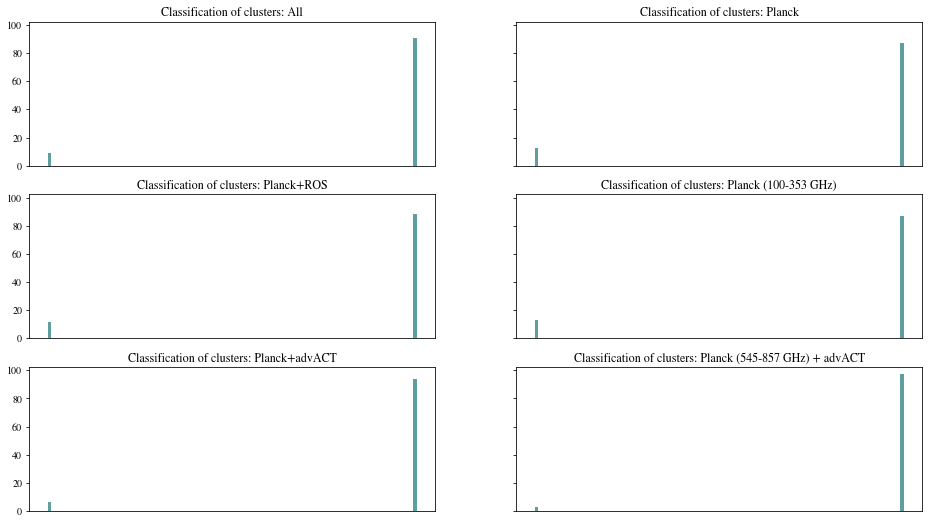

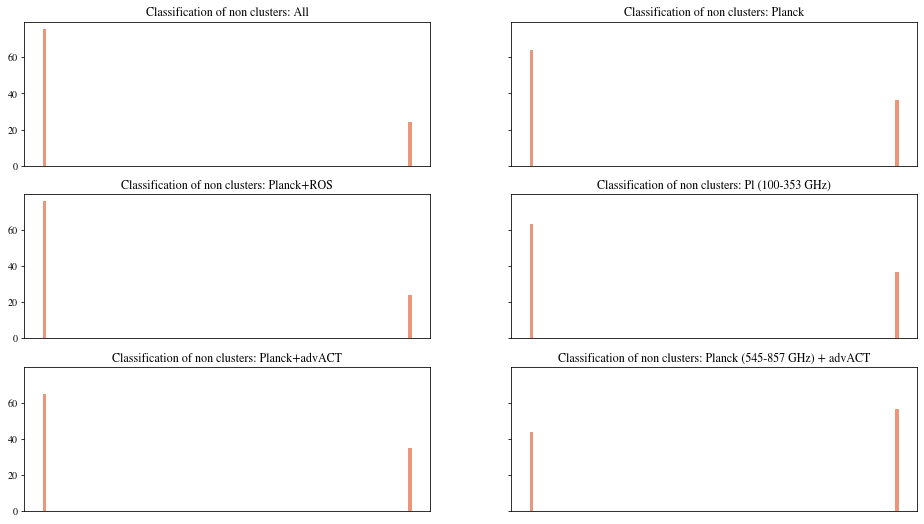

0.9080355110402913 0.8857179096905125 0.9385385841110858 0.8729071537290716 0.8720192795535261 0.9745048941497837
0.7569637883008357 0.7598934550989346 0.648096564531105 0.6386352105530188 0.6350837138508372 0.43546889507892295


In [13]:
i=1
print("alpha={}".format(i))
df,df2,df3 = make_dfs(i)
clf_act, clf_pl_low, clf_pl, clf_pl_act, clf_pl_ros, clf_full, intensity_clusters_act, intensity_voids_act, intensity_combined_act, intensity_clusters_pl_low,intensity_voids_pl_low,intensity_combined_pl_low, intensity_clusters_pl, intensity_voids_pl,intensity_combined_pl,intensity_clusters_pl_act,intensity_voids_pl_act, intensity_combined_pl_act, intensity_clusters_pl_ros, intensity_voids_pl_ros, intensity_combined_pl_ros, intensity_clusters_full, intensity_voids_full, intensity_combined_full = make_svms(df,df2,df3)
cluster_act, cluster_pl_low, cluster_pl, cluster_pl_act, cluster_pl_ros, cluster_full, no_cluster_act, no_cluster_pl_low, no_cluster_pl, no_cluster_pl_act, no_cluster_pl_ros, no_cluster_full = make_cluster_samples(clf_act, clf_pl_low, clf_pl, clf_pl_act, clf_pl_ros, clf_full, intensity_clusters_act, intensity_voids_act, intensity_combined_act, intensity_clusters_pl_low,intensity_voids_pl_low,intensity_combined_pl_low, intensity_clusters_pl, intensity_voids_pl,intensity_combined_pl,intensity_clusters_pl_act,intensity_voids_pl_act, intensity_combined_pl_act, intensity_clusters_pl_ros, intensity_voids_pl_ros, intensity_combined_pl_ros, intensity_clusters_full, intensity_voids_full, intensity_combined_full)
make_plots(cluster_act, cluster_pl_low, cluster_pl, cluster_pl_act, cluster_pl_ros, cluster_full, no_cluster_act, no_cluster_pl_low, no_cluster_pl, no_cluster_pl_act, no_cluster_pl_ros, no_cluster_full)

---

# Identification of clusters

In [ ]:
# Csv importer wrapped in a function that can be mapped for parallelization
def read_csv(filename):
    return pd.DataFrame(np.loadtxt(filename,delimiter=', ')).T

In [ ]:
fsky = pd.DataFrame()
fsky['ras'] = np.loadtxt('../data/new/ras_voids_plfsky.csv',delimiter=', ')
fsky['decs'] = np.loadtxt('../data/new/decs_voids_plfsky.csv',delimiter=', ')

# Convert the RA and DEC to galactic coordinates
c = SkyCoord(fsky['ras'],fsky['decs'],frame='icrs',unit='deg')
fsky['glat'] = c.galactic.b.degree
fsky['glon'] = c.galactic.l.degree

In [ ]:
fsky['int100'] = np.loadtxt('../data/new/_planck_fsky_100.csv',delimiter=', ')
fsky['int143'] = np.loadtxt('../data/new/_planck_fsky_143.csv',delimiter=', ')
fsky['int217'] = np.loadtxt('../data/new/_planck_fsky_217.csv',delimiter=', ')
fsky['int353'] = np.loadtxt('../data/new/_planck_fsky_353.csv',delimiter=', ')
fsky['int545'] = np.loadtxt('../data/new/_planck_fsky_545.csv',delimiter=', ')
fsky['int857'] = np.loadtxt('../data/new/_planck_fsky_857.csv',delimiter=', ')
fsky['int090'] = np.loadtxt('../data/new/_act_090_fsky.csv',delimiter=', ')
fsky['int150'] = np.loadtxt('../data/new/_act_150_fsky.csv',delimiter=', ')
fsky['int220'] = np.loadtxt('../data/new/_act_220_fsky.csv',delimiter=', ')
fsky['introsat'] = np.loadtxt('../data/new/_rosat_voids.csv',delimiter=', ')

In [ ]:
fsky

In [ ]:
# All
cluster_prob_full = np.array([clf_full.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'int090', 'int150', 'int220', 'introsat']].values]).flatten()

# Planck+ROSAT
cluster_prob_pl_ros = np.array([clf_pl_ros.predict([[i100, i143, i217, i353, i545, i857, irosat]]) for i100, i143, i217, i353, i545, i857, irosat in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'introsat']].values]).flatten()

# Planck+ACT
cluster_prob_pl_act = np.array([clf_pl_act.predict([[i100, i143, i217, i353, i545, i857, i090, i150, i150]]) for i100, i143, i217, i353, i545, i857, i090, i150, i220 in fsky[['int100','int143','int217','int353', 'int545', 'int857', 'int090', 'int150', 'int220']].values]).flatten()

# Planck-only
cluster_prob_pl = np.array([clf_pl.predict([[i100, i143, i217, i353, i545, i857]]) for i100, i143, i217, i353, i545, i857 in fsky[['int100','int143','int217','int353', 'int545', 'int857']].values]).flatten()

# # ACT-only
cluster_prob_act = np.array([clf_act.predict([[i090, i150, i220, i545, i857]]) for i090,i150,i220,i545,i857 in fsky[['int090','int150','int220', 'int545', 'int857']].values]).flatten()

# Low-freq Planck
cluster_prob_pl_low = np.array([clf_pl_low.predict([[i100, i143, i217, i353]]) for i100, i143, i217, i353 in fsky[['int100','int143','int217','int353']].values]).flatten()

In [ ]:
voids = pd.read_csv('voids_complete.csv', skiprows = 0, index_col=0)
ras_voids = voids['amf_ra'].reset_index(drop=True)
decs_voids = voids['amf_dec'].reset_index(drop=True)

real = pd.read_csv('../data/ard_not_adv.csv',skiprows=0,index_col=0)
ras_real = real['amf_ra'].reset_index(drop=True)
decs_real = real['amf_dec'].reset_index(drop=True)

In [ ]:
fsky[fsky.glon.isin(real['glon'].values)]

In [ ]:
fsky['cluster_full'] = cluster_prob_full
fsky['cluster_pl_ros'] = cluster_prob_pl_ros
fsky['cluster_pl_act'] = cluster_prob_pl_act
fsky['cluster_pl'] = cluster_prob_pl
fsky['cluster_pl_low'] = cluster_prob_pl_low
fsky['cluster_act'] = cluster_prob_act

In [ ]:
pl143 = hp.read_map('../data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits')

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Full')
hp.visufunc.projscatter(fsky[(fsky.glon.isin(real['glon'].values)) & (fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.glon.isin(real['glon'].values)) &(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.glon.isin(real['glon'].values)) &(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_full'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl+ROS')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl_ros,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl+ACT')
hp.visufunc.projscatter(fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_pl_act'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Pl (100-353)')
hp.visufunc.projscatter(fsky['glon'],fsky['glat'],c=cluster_prob_pl_low,lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)

In [ ]:
hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='ACT')
hp.visufunc.projscatter(fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glon'],fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['glat'],c=fsky[(fsky.int090!=-9999)&(fsky.int150!=-9999)&(fsky.int220!=-9999)]['cluster_act'],lonlat=True,s=10)
# plt.scatter(fsky['glon'],fsky['glat'],c=fsky.cluster,s=1)